<a href="https://colab.research.google.com/github/peiyulan/Text-Classification-in-Practice-From-Topic-Models-to-Transformers-/blob/main/Task1-LDA-News%20Classification/Task1_LDA_News_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Text Classification: Topic Modeling LDA​**


## Overview

We will learn the about the most widely used text classification model LDA through:

> An introduction to what and how does LDA model work?

> Implementation of LDA model wiht Python:
- Activity 1: Text representation
- Activity 2: Training LDA model

> Analysising your results
- Activity 3: Visualisation of text classification



---



# **Overview of Latent Dirichlet Allocation (LDA)**

![LDA.jpg](https://media.springernature.com/full/springer-static/image/chp%3A10.1007%2F978-981-19-3035-5_29/MediaObjects/520032_1_En_29_Fig3_HTML.png?as=webp)

# **Implementation of LDA**
---
### Steps
- Loading data and visualise data
- Prepare data for LDA analysis
- Training LDA model
- Analysing LDA model results

---

### Dataset
> The datasets we will use today:

BBC News Datasets (D. Greene and P. Cunningham. "Practical Solutions to the Problem of Diagonal Dominance in Kernel Document Clustering", Proc. ICML 2006. [PDF].)

The dataset was retrieved from BBC News, and has been widely used in machine-learning and traing text-classification models.
These datasets are made available for non-commercial and research purposes only.

The dataset contains 2225 news articles published between 2004-2005 on the BBC news website. Each article is labeled with one of the five topics: Politics, Business, Technology, Entertainment and Sport.


Source of dataset:
https://huggingface.co/datasets/SetFit/bbc-news

> CNN-DailyMail News Text Summarization
The CNN / DailyMail Dataset is an English-language dataset containing just over 300k unique news articles as written by journalists at CNN and the Daily Mail. The current version supports both extractive and abstractive summarization, though the original version was created for machine reading and comprehension and abstractive question answering.

Source of dataset:
https://www.kaggle.com/datasets/gowrishankarp/newspaper-text-summarization-cnn-dailymail?resource=download



---



# Loading Python library and datasets

In [1]:
# ============================
# Import Python libriary
# ============================

!pip install gensim
!pip install pyLDAvis
!pip install nltk

import nltk
nltk.download('punkt_tab')
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 85.2 MB/s eta 0:00:00


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [2]:
# ============================
# Download datasets
# ============================

import zipfile

# Open the zip file
!wget https://github.com/DCS-training/Text-Calssification-in-Practice-From-Topic-Models-to-Transformers/raw/refs/heads/main/Task1-LDA-News%20Classification/LDA_data.zip
!unzip /content/LDA_data.zip


--2025-11-10 17:03:39--  https://github.com/DCS-training/Text-Calssification-in-Practice-From-Topic-Models-to-Transformers/raw/refs/heads/main/Task1-LDA-News%20Classification/LDA_data.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/DCS-training/Text-Calssification-in-Practice-From-Topic-Models-to-Transformers/refs/heads/main/Task1-LDA-News%20Classification/LDA_data.zip [following]
--2025-11-10 17:03:39--  https://raw.githubusercontent.com/DCS-training/Text-Calssification-in-Practice-From-Topic-Models-to-Transformers/refs/heads/main/Task1-LDA-News%20Classification/LDA_data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awa

## Load dataset to python

In [4]:
import pandas as pd
import os

# Read the CSV file into a pandas DataFrame
file1 = "cnnnews_data.csv"
file2 = "BBCnews_data.csv"

data = pd.read_csv(file1)   # Feel free to change it to file2 and play with different dataset
data = data[:2000]          # We pick the first 2000 articles in the dataset for faster results

# Print name of each column and numer of data points
print(data.info(verbose=True), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          2000 non-null   object
 1   article     2000 non-null   object
 2   highlights  2000 non-null   object
dtypes: object(3)
memory usage: 47.0+ KB
None 



In [5]:
# Print the first 5 rows in the dataset
print(">>> The first 5 rows in the dataset")
print(data.head())

>>> The first 5 rows in the dataset
                                         id  \
0  92c514c913c0bdfe25341af9fd72b29db544099b   
1  2003841c7dc0e7c5b1a248f9cd536d727f27a45a   
2  91b7d2311527f5c2b63a65ca98d21d9c92485149   
3  caabf9cbdf96eb1410295a673e953d304391bfbb   
4  3da746a7d9afcaa659088c8366ef6347fe6b53ea   

                                             article  \
0  Ever noticed how plane seats appear to be gett...   
1  A drunk teenage boy had to be rescued by secur...   
2  Dougie Freedman is on the verge of agreeing a ...   
3  Liverpool target Neto is also wanted by PSG an...   
4  Bruce Jenner will break his silence in a two-h...   

                                          highlights  
0  Experts question if  packed out planes are put...  
1  Drunk teenage boy climbed into lion enclosure ...  
2  Nottingham Forest are close to extending Dougi...  
3  Fiorentina goalkeeper Neto has been linked wit...  
4  Tell-all interview with the reality TV star, 6...  


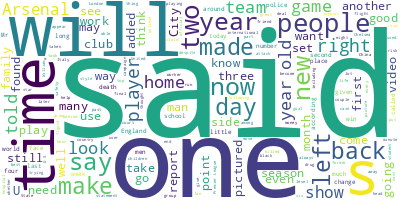

In [6]:
# Import the wordcloud library
from wordcloud import WordCloud

# Randomly select 100 articles and join them together (for faster processing)
long_string = ','.join(list(data['article'].sample(100).values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()



---



# Prepare data for LDA analysis

Before we can use the LDA model, data needs to be processed and transformed in a format that can be use as an input for LAD model, these steps inclues:

1. Tokenize the text
2. Remove stopwords
3. Convert the tokenized object into a corpus and dictionary

## 01 - Tokenization

Tokenisers work by splitting text into smaller components, or the unit for analysis.

For example, an article can be split into sentences, or words, depending on the purpose of your analysis.

This is usually done by identifyin the "separator"  or "delimiter" in the data.

For example, the " "(blank space) between words in a sentence, or the ","(comma) or "." (period)

In [7]:
# ============================
# Practice tokenization
# ============================

from nltk.tokenize import sent_tokenize, word_tokenize

text = "This is an example sentence. It has five words."#example_sentence
print("Use sent_tokenize to split data into sentences")
print(sent_tokenize(text)) # nltk.tokenize.sent_tokenize(text, language='english')

print("\nUse word_tokenize to split data into sentences")
print(word_tokenize(text))


Use sent_tokenize to split data into sentences
['This is an example sentence.', 'It has five words.']

Use word_tokenize to split data into sentences
['This', 'is', 'an', 'example', 'sentence', '.', 'It', 'has', 'five', 'words', '.']


In [8]:
# Note that tokenisation is similart but different from .splited list

print(word_tokenize(text))
print(text.split(" "))

['This', 'is', 'an', 'example', 'sentence', '.', 'It', 'has', 'five', 'words', '.']
['This', 'is', 'an', 'example', 'sentence.', 'It', 'has', 'five', 'words.']


In our case, as we are not interested in analysing punctuation, we will first remove punctuation marks and choose " " as the diameter to tokenise or data.

In [9]:
# ============================
# Remove punctuation
# ============================

# Load the Regex (regular expression) library to clean up the data
import re

# Remove punctuation
article = data['article']
cleaned_article = article.map(lambda x: re.sub('[,\.!?]', '', x)) # Search for each row of data, and replace "[,\.!?]", with "" (nothing)
cleaned_article = cleaned_article.map(lambda x: x.lower()) # Make everything letter lower-case.

<>:10: SyntaxWarning: invalid escape sequence '\.'
<>:10: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-548536032.py:10: SyntaxWarning: invalid escape sequence '\.'
  cleaned_article = article.map(lambda x: re.sub('[,\.!?]', '', x)) # Search for each row of data, and replace "[,\.!?]", with "" (nothing)


In [10]:
# Compare results

print("Original article:")
print(article[0], "\n")
print("Article after removing punctuation and lower-case:")
print(cleaned_article[0])

Original article:
Ever noticed how plane seats appear to be getting smaller and smaller? With increasing numbers of people taking to the skies, some experts are questioning if having such packed out planes is putting passengers at risk. They say that the shrinking space on aeroplanes is not only uncomfortable - it's putting our health and safety in danger. More than squabbling over the arm rest, shrinking space on planes putting our health and safety in danger? This week, a U.S consumer advisory group set up by the Department of Transportation said at a public hearing that while the government is happy to set standards for animals flying on planes, it doesn't stipulate a minimum amount of space for humans. 'In a world where animals have more rights to space and food than humans,' said Charlie Leocha, consumer representative on the committee. 'It is time that the DOT and FAA take a stand for humane treatment of passengers.' But could crowding on planes lead to more serious issues than f

Now let's use the method above to tokenise the dataset "news["cleaned_article"]"

In [11]:
# ============================
# Tokenize the dataset
# ============================

tokenised_articles = [word_tokenize(article) for article in cleaned_article]

In [12]:
# print the first tokenised article in the dataset

print(tokenised_articles[0])

['ever', 'noticed', 'how', 'plane', 'seats', 'appear', 'to', 'be', 'getting', 'smaller', 'and', 'smaller', 'with', 'increasing', 'numbers', 'of', 'people', 'taking', 'to', 'the', 'skies', 'some', 'experts', 'are', 'questioning', 'if', 'having', 'such', 'packed', 'out', 'planes', 'is', 'putting', 'passengers', 'at', 'risk', 'they', 'say', 'that', 'the', 'shrinking', 'space', 'on', 'aeroplanes', 'is', 'not', 'only', 'uncomfortable', '-', 'it', "'s", 'putting', 'our', 'health', 'and', 'safety', 'in', 'danger', 'more', 'than', 'squabbling', 'over', 'the', 'arm', 'rest', 'shrinking', 'space', 'on', 'planes', 'putting', 'our', 'health', 'and', 'safety', 'in', 'danger', 'this', 'week', 'a', 'us', 'consumer', 'advisory', 'group', 'set', 'up', 'by', 'the', 'department', 'of', 'transportation', 'said', 'at', 'a', 'public', 'hearing', 'that', 'while', 'the', 'government', 'is', 'happy', 'to', 'set', 'standards', 'for', 'animals', 'flying', 'on', 'planes', 'it', 'does', "n't", 'stipulate', 'a', 'm

## 02- Remove stopwords

Stop words are commonly used words. In English, for example, "the" , "is", "what", are all stopwords.

As these words do not carry much information of meaning in a sentence, they are usually excluded from the data to achieve a better analysis result.

In [13]:
# ============================
# Remove stopwords
# ============================

import gensim    # open source Python library for text processing
from gensim.utils import simple_preprocess
import nltk      # natual language processing tool kit
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = stopwords.words('english')
customised_stopwords = ['from', 'mr', 'edu', 'use'] # You can add your own stopwords
stop_words.extend(customised_stopwords)

# function for removing stop words
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]

tokenised_articles_no_stopwords = remove_stopwords(tokenised_articles)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
# Compare results

print("The length of \nthe article: {}\ntokenised article: {}\nwithout stopwords: {}\n".format(len(cleaned_article[0]),len(tokenised_articles[0]), len(tokenised_articles_no_stopwords[0])))

print(cleaned_article[0], "\n") # Original article
print(tokenised_articles[0], "\n") # Tokenised article
print(tokenised_articles_no_stopwords[0], "\n") # Tokenised article without stopwords

The length of 
the article: 2090
tokenised article: 374
without stopwords: 192

ever noticed how plane seats appear to be getting smaller and smaller with increasing numbers of people taking to the skies some experts are questioning if having such packed out planes is putting passengers at risk they say that the shrinking space on aeroplanes is not only uncomfortable - it's putting our health and safety in danger more than squabbling over the arm rest shrinking space on planes putting our health and safety in danger this week a us consumer advisory group set up by the department of transportation said at a public hearing that while the government is happy to set standards for animals flying on planes it doesn't stipulate a minimum amount of space for humans 'in a world where animals have more rights to space and food than humans' said charlie leocha consumer representative on the committee 'it is time that the dot and faa take a stand for humane treatment of passengers' but could crowd

## 03- Text representation: Bag of words (BOW)

The last step of text processing is turning textual data into numerical format. In our case, we want to turn a news article into a series of numbers that represent the article.

One of the most common way to do this is "bag-of-words" or BOW.

It works by creating a vocabulary of all unique words in a collection of documents and then representing each document as a vector of word counts.

For example:
- Tokens: {banana, apple, walk, on, the, street, dog}
- Sentence 1 vector: {banana: 2, apple: 1, walk: 1, on: 1, the: 1, street: 1, dog: 1}
- Sentence 2 vector: {banana: 1, apple: 0, walk: 1, on: 1, the: 2, street: 1, dog: 0}


This represenation ignore the order and grammatical relationship between words, and simply count the number of appearance (frequency) of a given word in the text. It is commonly used in text classification or compare similarity between documents.

In general, this model works better on longer

In [15]:
# ============================
# Create a dictionary of tokens
# ============================

import gensim.corpora as corpora

# This assign an index to each token (word)
id2word = corpora.Dictionary(tokenised_articles_no_stopwords)

for index in id2word.keys()[:10]:
    print(index, id2word[index])

0 administration
1 advisory
2 aeroplanes
3 air
4 airlines
5 airways
6 amount
7 animals
8 appear
9 arm


In [17]:
# ============================
# Create a corpus (numerical representation of documents, in our case, bag of words)
# ============================

# turn each article into "Bag of words"
corpus = [id2word.doc2bow(document) for document in tokenised_articles_no_stopwords]

# View
print("article 1", corpus[0])
print("article 2", corpus[1])

article 1 [(0, 1), (1, 1), (2, 1), (3, 2), (4, 7), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 2), (27, 2), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 2), (34, 1), (35, 1), (36, 1), (37, 2), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 2), (51, 1), (52, 1), (53, 1), (54, 2), (55, 1), (56, 11), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 2), (73, 1), (74, 1), (75, 1), (76, 3), (77, 1), (78, 5), (79, 2), (80, 6), (81, 2), (82, 1), (83, 3), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 2), (95, 2), (96, 1), (97, 5), (98, 5), (99, 1), (100, 2), (101, 1), (102, 2), (103, 1), (104, 2), (105, 6), (106, 1), (107, 1), (108, 1), (109, 2)



---



## 03 Train LDA model

Documentation of the gensim LDA model: https://radimrehurek.com/gensim/models/ldamodel.html

Let's try the most basic function using LdaMulticore

In [19]:
# ============================
# Train LDA model
# ============================

from pprint import pprint

# number of topics
num_topics = 5

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)


In [20]:
# Print the keyword for each of the 5 topics

pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.011*"said" + 0.005*"one" + 0.004*"year" + 0.003*"also" + 0.003*"would" + '
  '0.003*"people" + 0.003*"two" + 0.003*"years" + 0.002*"time" + '
  '0.002*"could"'),
 (1,
  '0.008*"said" + 0.005*"year" + 0.004*"one" + 0.004*"would" + 0.004*"two" + '
  '0.003*"also" + 0.003*"last" + 0.003*"first" + 0.003*"old" + 0.002*"people"'),
 (2,
  '0.008*"said" + 0.005*"one" + 0.003*"would" + 0.003*"year" + 0.003*"also" + '
  '0.003*"two" + 0.003*"could" + 0.003*"new" + 0.003*"people" + 0.003*"first"'),
 (3,
  '0.010*"said" + 0.005*"year" + 0.004*"one" + 0.004*"time" + 0.003*"would" + '
  '0.003*"two" + 0.003*"people" + 0.003*"last" + 0.003*"also" + 0.003*"left"'),
 (4,
  '0.009*"said" + 0.004*"year" + 0.003*"one" + 0.003*"time" + 0.003*"also" + '
  '0.003*"first" + 0.003*"last" + 0.003*"people" + 0.003*"years" + '
  '0.003*"would"')]


In [21]:
# ============================
# Vidualise the results
# ============================

import pyLDAvis.gensim_models as gensimvis
import pickle
import pyLDAvis


# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))

LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
LDAvis_prepared

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.002247 -0.006608       1        1  22.031071
3      0.001077 -0.002470       2        1  21.841352
1     -0.000806  0.003422       3        1  20.360005
0     -0.007915  0.000770       4        1  19.317299
2      0.005397  0.004886       5        1  16.450273, topic_info=          Term         Freq        Total Category  logprob  loglift
73         one  3192.000000  3192.000000  Default  30.0000  30.0000
95        said  6722.000000  6722.000000  Default  29.0000  29.0000
413   children   834.000000   834.000000  Default  28.0000  28.0000
123         us  1205.000000  1205.000000  Default  27.0000  27.0000
727       cent   522.000000   522.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
1123     years   243.939121  1825.085407   Topic5  -6.2171  -0.2076
191     police   226.785270  1630.330606   Topic5  -6.2900  -0.1677
140       city   189.387768  1132.282366   Topic5  -6.4702   0.0166
508       like   204.202130  1425.441265   Topic5  -6.3949  -0.1383
1700       day   186.818610  1321.096992   Topic5  -6.4839  -0.1513

[445 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
267        1  0.236699  according
267        2  0.171280  according
267        3  0.199826  according
267        4  0.235509  according
267        5  0.157006  according
...      ...       ...        ...
15999      1  0.197506      zouma
15999      2  0.197506      zouma
15999      3  0.098753      zouma
15999      4  0.098753      zouma
15999      5  0.444389      zouma

[1289 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 2, 1, 3])

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


## 04 Analyse the results and identify ways to get better results

In [24]:
# ============================
# Filter extreme words (frequency)
# ============================
warnings.filterwarnings("ignore", category=DeprecationWarning)

id2word = corpora.Dictionary(tokenised_articles_no_stopwords)
id2word.filter_extremes(
#   no_below=5,    # Keep tokens which are in at least 5 documents
    no_above=0.5,  # Keep tokens which are in no more than 50% of the documents (fraction)
    keep_n=10000  # Keep only the first 100,000 most frequent tokens (optional, for memory control)
)
corpus = [id2word.doc2bow(document) for document in tokenised_articles_no_stopwords]





In [25]:
from pprint import pprint

num_topics = 6

# Build LDA model
lda_model = gensim.models.ldamulticore.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics= num_topics,
                                           random_state=100,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=80,
                                           per_word_topics=True)


In [26]:
import pyLDAvis.gensim_models as gensimvis
import pickle
import pyLDAvis

# Print the Keyword in each topic
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
LDAvis_prepared

[(0,
  '0.011*"police" + 0.008*"car" + 0.007*"people" + 0.006*"group" + '
  '0.006*"killed" + 0.005*"north" + 0.005*"city" + 0.005*"al" + 0.005*"video" '
  '+ 0.005*"incident"'),
 (1,
  '0.007*"like" + 0.007*"get" + 0.006*"new" + 0.006*"first" + 0.005*"day" + '
  '0.005*"make" + 0.005*"says" + 0.004*"look" + 0.004*"well" + 0.004*"world"'),
 (2,
  '0.013*"would" + 0.009*"people" + 0.007*"government" + 0.007*"party" + '
  '0.006*"new" + 0.006*"us" + 0.006*"labour" + 0.006*"campaign" + '
  '0.005*"million" + 0.005*"company"'),
 (3,
  '0.009*"united" + 0.009*"league" + 0.008*"team" + 0.008*"season" + '
  '0.008*"game" + 0.008*"back" + 0.007*"club" + 0.007*"england" + '
  '0.007*"first" + 0.007*"manchester"'),
 (4,
  '0.011*"cancer" + 0.009*"years" + 0.008*"could" + 0.007*"found" + '
  '0.007*"health" + 0.006*"may" + 0.006*"dr" + 0.006*"breast" + '
  '0.005*"research" + 0.005*"food"'),
 (5,
  '0.012*"told" + 0.010*"home" + 0.008*"family" + 0.008*"old" + 0.008*"mother" '
  '+ 0.006*"years" +

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.161909  0.025964       1        1  26.488872
5      0.043670 -0.084407       2        1  20.889964
3      0.256951 -0.004424       3        1  15.855160
0     -0.188565 -0.273705       4        1  13.382970
2     -0.114136  0.061323       5        1  12.865857
4     -0.159830  0.275250       6        1  10.517177, topic_info=        Term         Freq        Total Category  logprob  loglift
160   police  1653.000000  1653.000000  Default  30.0000  30.0000
517     told  1908.000000  1908.000000  Default  29.0000  29.0000
386   family  1122.000000  1122.000000  Default  28.0000  28.0000
7033  cancer   733.000000   733.000000  Default  27.0000  27.0000
275   league   874.000000   874.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
340   around   281.398052  1010.324613   Topic6  -5.4585   0.9739
64    people   243.487422  2043.609757   Topic6  -5.6032   0.1248
50     known   206.383487   494.607595   Topic6  -5.7685   1.3781
104    using   199.831953   287.890846   Topic6  -5.8008   1.8871
437     like   211.160492  1443.380839   Topic6  -5.7457   0.3300

[364 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1460      4  0.996738      abuse
227       2  0.396480  according
227       4  0.429238  according
227       5  0.106180  according
227       6  0.067774  according
...     ...       ...        ...
957       1  0.097850      years
957       2  0.462235      years
957       3  0.035418      years
957       5  0.057629      years
957       6  0.346977      years

[595 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 6, 4, 1, 3, 5])

In [27]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()
    topic = []
    prop= []
    keywords = []

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                topic.append(int(topic_num))
                prop.append(round(prop_topic,4))
                keywords.append(topic_keywords)
            else:
                break
    sent_topics_df['Dominant_Topic'] = topic
    sent_topics_df['Perc_Contribution'] =prop
    sent_topics_df['Topic_Keywords']=keywords
    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=tokenised_articles_no_stopwords)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
#df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']


In [28]:
df_dominant_topic.head(10)

,index,Dominant_Topic,Perc_Contribution,Topic_Keywords,0
0,0,0,0.4262,"police, car, people, group, killed, north, cit...","[ever, noticed, plane, seats, appear, getting,..."
1,1,0,0.6668,"police, car, people, group, killed, north, cit...","[drunk, teenage, boy, rescued, security, jumpi..."
2,2,3,0.7640,"united, league, team, season, game, back, club...","[dougie, freedman, verge, agreeing, new, two, ..."
3,3,3,0.7200,"united, league, team, season, game, back, club...","[liverpool, target, neto, also, wanted, psg, c..."
4,4,5,0.4042,"told, home, family, old, mother, years, court,...","[bruce, jenner, break, silence, two, hour, int..."
5,5,0,0.5409,"police, car, people, group, killed, north, cit...","[moment, crew, firefighters, struggled, haul, ..."
6,6,2,0.4365,"would, people, government, party, new, us, lab...","[amount, time, people, spend, listening, bbc, ..."
7,7,1,0.5047,"like, get, new, first, day, make, says, look, ...","[cnn, like, full, house, reunion, spinoff, got..."
8,8,1,0.4208,"like, get, new, first, day, make, says, look, ...","[pm, former, world, champion, ken, doherty, po..."
9,9,5,0.7286,"told, home, family, old, mother, years, court,...","[gang, six, men, jailed, total, years, convict..."




---



# **Resources List**

**Tutorials**
Different ways to visualise results of LDA analysis:https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/

